# Loan Application Status Prediction

Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- Applicant Income

- Coapplicant Income

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.

In [ ]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [ ]:
df=pd.read_csv('loan_prediction.csv')

In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [ ]:
print('Dataset have',df.shape[0],'rows and',df.shape[1],'columns')

Dataset have 614 rows and 13 columns


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


This is a Classification Problem since the Target variable / Label column ("Loan_Status") has Catergorical type of Data.

In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Checking Data Types

In [ ]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Checking Null/Missing values

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History columns have null values.

In [ ]:
df.isnull().sum().sum()

149

<AxesSubplot:>

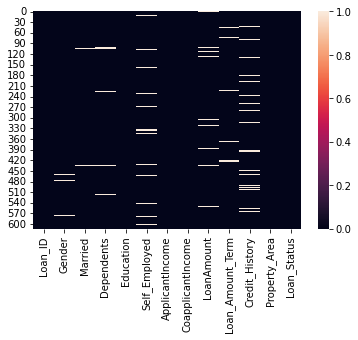

In [ ]:
sns.heatmap(df.isnull())

# Filling Categorical Columns missing values with mode

In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

# Filling Continuous Columns missing values with mean

In [ ]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Statistical Summary

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,146.412162,84.037468,9.0,100.25,129.0,164.75,700.0
Loan_Amount_Term,614.0,342.000000,64.372489,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.842199,0.349681,0.0,1.00,1.0,1.00,1.0


A higher std deviation than mean in ApplicantIncome and CoapplicantIncome columns indicates skewness.

There is a huge difference between 75% and max in ApplicantIncome,CoapplicantIncome and LoanAmount, indicating presence of outliers.

# Checking for Unique values

In [ ]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         3
Property_Area          3
Loan_Status            2
dtype: int64

Gender,Married,Education,Self_Employed,Loan_Status each have 2 unique elements.

Dependents has 4 unique elements.

Credit_History,Property Area has 3 unique elements.

In [ ]:
for i in df.columns[1:]:
    print(i,'have unique values =',df[i].unique(),'\n')

Gender have unique values = ['Male' 'Female'] 

Married have unique values = ['No' 'Yes'] 

Dependents have unique values = ['0' '1' '2' '3+'] 

Education have unique values = ['Graduate' 'Not Graduate'] 

Self_Employed have unique values = ['No' 'Yes'] 

ApplicantIncome have unique values = [ 5849  4583  3000  2583  6000  5417  2333  3036  4006 12841  3200  2500
  3073  1853  1299  4950  3596  3510  4887  2600  7660  5955  3365  3717
  9560  2799  4226  1442  3750  4166  3167  4692  3500 12500  2275  1828
  3667  3748  3600  1800  2400  3941  4695  3410  5649  5821  2645  4000
  1928  3086  4230  4616 11500  2708  2132  3366  8080  3357  3029  2609
  4945  5726 10750  7100  4300  3208  1875  4755  5266  1000  3333  3846
  2395  1378  3988  2366  8566  5695  2958  6250  3273  4133  3620  6782
  2484  1977  4188  1759  4288  4843 13650  4652  3816  3052 11417  7333
  3800  2071  5316  2929  3572  7451  5050 14583  2214  5568 10408  5667
  2137  2957  3692 23803  3865 10513  6080 20166  

In [ ]:
# object data types list creation:
object_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        object_datatype.append(x)
object_datatype

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [ ]:
# integer data types list creation:
integer_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'int64':
        integer_datatype.append(x)
integer_datatype

['ApplicantIncome']

In [ ]:
# float data types list creation:
float_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64':
        float_datatype.append(x)
float_datatype

['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# EXPLORATORY DATA ANALYSIS

# Analysing Target column

In [ ]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

There are 2 unique categorical values.

Class 'Y' : Has 422 values

'N' : Has 192 values

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

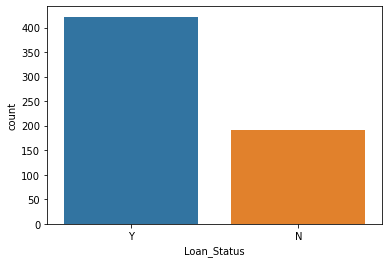

In [ ]:
sns.countplot(df['Loan_Status'])

Loan of the applicants have more approved than rejected in this dataset

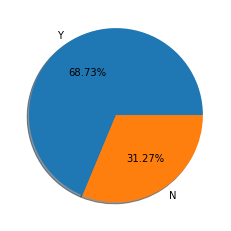

In [ ]:
labels = 'Y','N'
fig, ax = plt.subplots()
ax.pie(df['Loan_Status'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

Class

'Y' : Has 68.73% of total values

'N' : Has 31.27% of total values

Classes are imbalanced

# Analysing Feature columns Catergorical Classes

In [ ]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

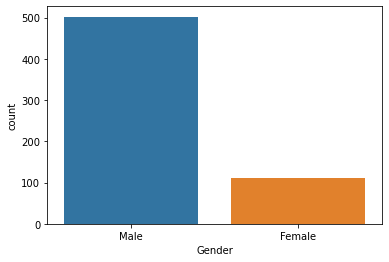

In [ ]:
sns.countplot(df['Gender'])

There are more Male Applicants than Female Applicants.

In [ ]:
df['Married'].unique()

array(['No', 'Yes'], dtype=object)

<AxesSubplot:xlabel='Married', ylabel='count'>

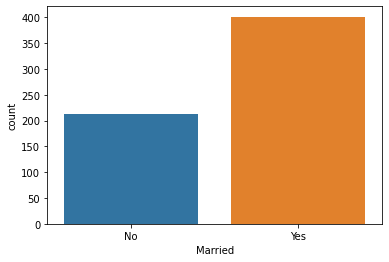

In [ ]:
sns.countplot(df['Married'])

There are more applicants who are married than those who are not.

<AxesSubplot:xlabel='Gender', ylabel='count'>

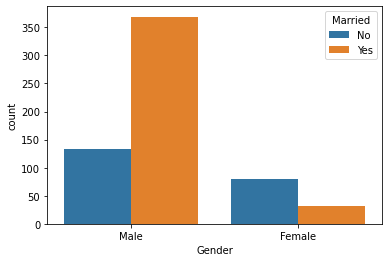

In [ ]:
sns.countplot(df['Gender'], hue=df['Married'])

Who asked for Loan?

Mostly Married Male   and  Non-married Females

In [ ]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

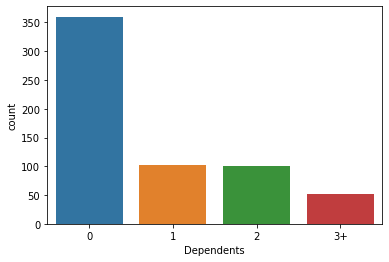

In [ ]:
sns.countplot(df['Dependents'])

Most applicants have no dependents to support

<AxesSubplot:xlabel='Dependents', ylabel='count'>

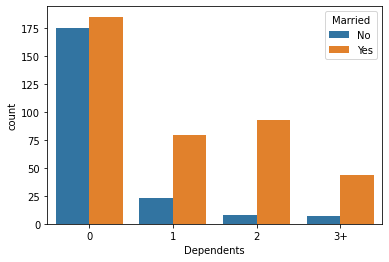

In [ ]:
sns.countplot(df['Dependents'],hue=df['Married'])

Married have more dependents

In [ ]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [ ]:
df['Education'].value_counts(normalize=True)

Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64

<AxesSubplot:xlabel='Education', ylabel='count'>

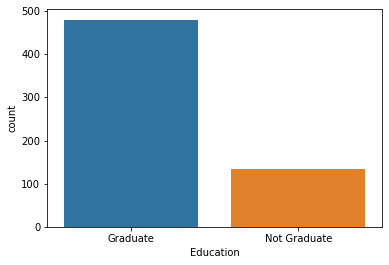

In [ ]:
sns.countplot(df['Education'])

78% applicants are Graduated

21.8% are not graduated

In [ ]:
df['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df['Self_Employed'].value_counts(normalize=True)

No     0.86645
Yes    0.13355
Name: Self_Employed, dtype: float64

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

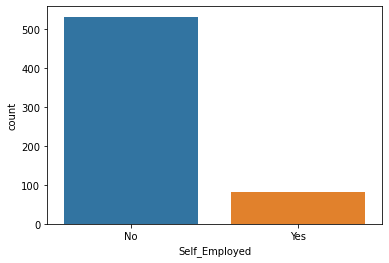

In [ ]:
sns.countplot(df['Self_Employed'])

Most applicants are not Self Employed.

In [ ]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

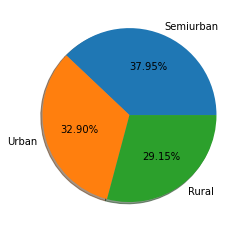

In [ ]:
labels = 'Semiurban','Urban','Rural'
fig, ax = plt.subplots()
ax.pie(df['Property_Area'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

37.95% applicants are from Semiurban, while 32.90% of applicants are from Urban and 29.15% are from Rural areas.

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

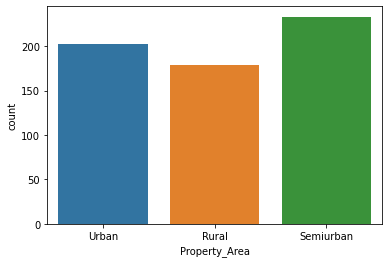

In [ ]:
sns.countplot(df['Property_Area'])

Loan of semiurban applicants have accepted the most in the dataset.

Loan of rural applicants have rejected the most in the dataset.

# Analysing Feature columns with Continuous Data

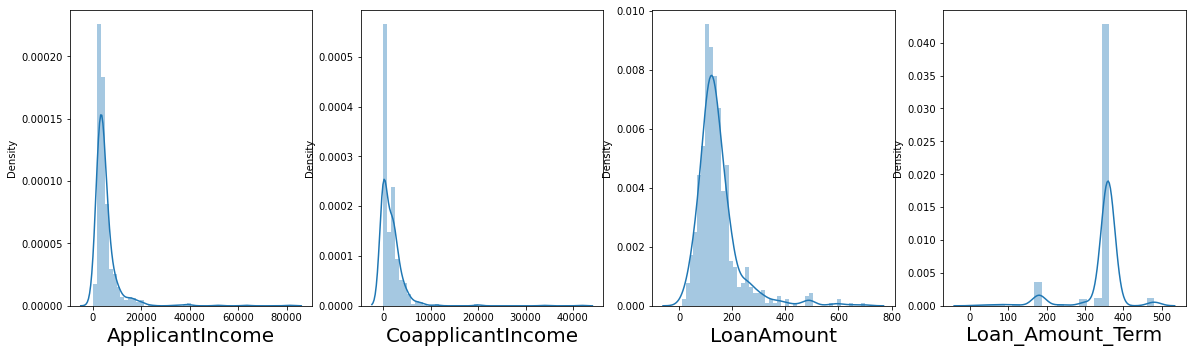

In [ ]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]:
    if plotnum<=10:
        plt.subplot(4,4,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Data distributions are skewed

In [ ]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']].skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
dtype: float64

# 'Loan_Status' vs Continuous/Discrete Data Columns

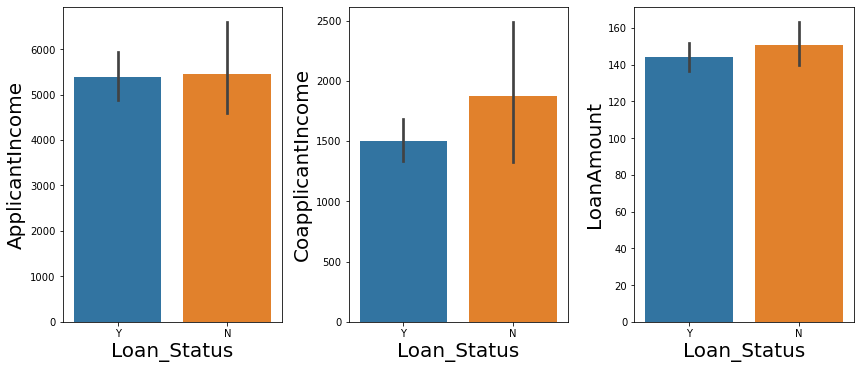

In [ ]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = df['Loan_Status']
X = df[['ApplicantIncome','CoapplicantIncome','LoanAmount']]
for col in X:
    if plotnum<=15:
        plt.subplot(5,5,plotnum)
        sns.barplot(y,X[col])
        plt.xlabel('Loan_Status',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

Following observations can be made from above graphs:

Applicant income doesnt seem to contribute significantly to loan approval.

Loan rejection is high for higher Coapplicant Income.

LoanAmount doesn't seem to have a strong correlation with Loan Status

# 'Loan_Status' vs Categorical Data Columns

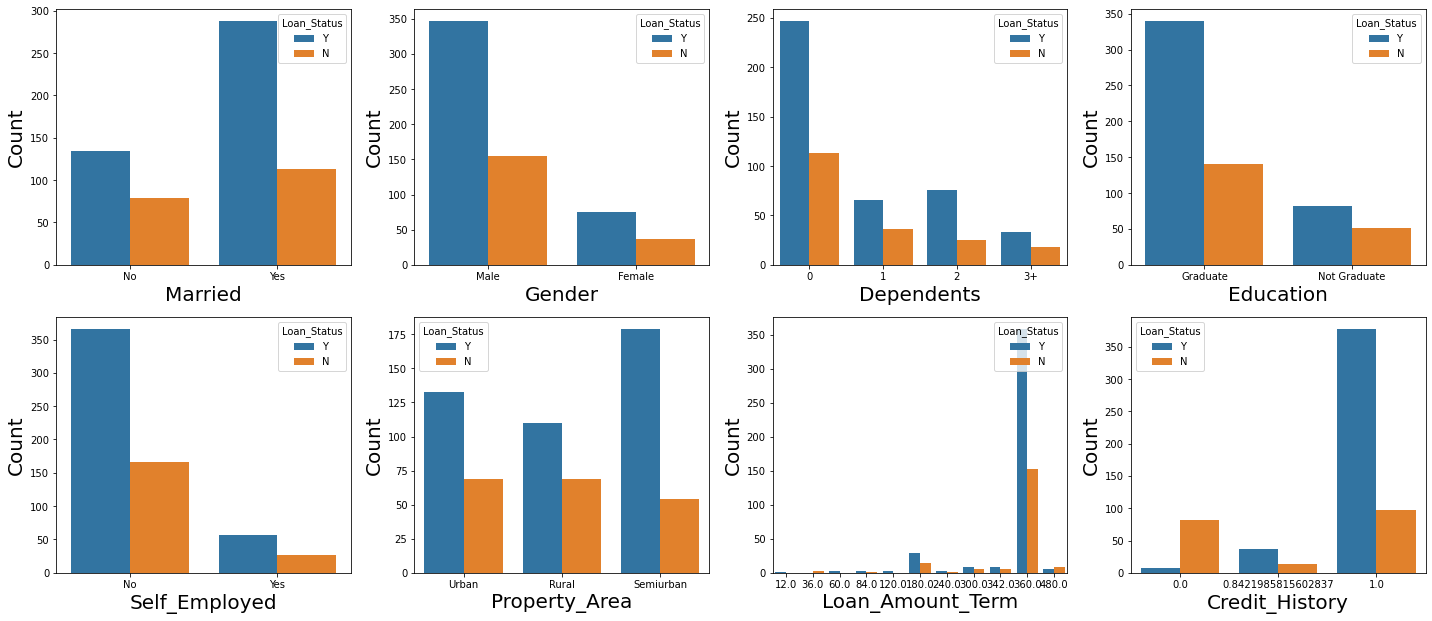

In [ ]:
plt.figure(figsize=(20,21),facecolor='white')
plotnum=1
X = df[['Married','Gender','Dependents','Education','Self_Employed','Property_Area','Loan_Amount_Term','Credit_History']]
y = df['Loan_Status']
for col in X:
    if plotnum<=23:
        plt.subplot(5,4,plotnum)
        sns.countplot(X[col],hue =y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnum+=1
plt.tight_layout()

Following observations can be made from above graphs:

Married applicants have higher loan approval.

More Male applicants get loan approval than Female applicants. This may also be due to the fact that there are more male applicants than female applicants.

Applicants with 0 dependents have highest loan approval.

Graduates have higher loan approval.

Applicants who are not self employed have higher loan approval.

Applicants from semi urban areas have highest loan approval.

Highest loan approval is for 360.

Applicants with Credit History of 1.0 has highest loan approval.

# Credit_History

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

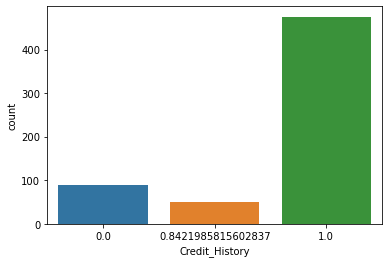

In [ ]:
sns.countplot(df['Credit_History'])

# Credit_History vs Loan

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

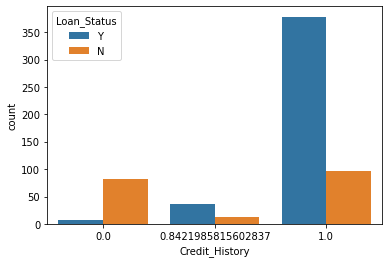

In [ ]:
sns.countplot(df['Credit_History'],hue=df['Loan_Status'])

In [ ]:
# If Credit history is available, Chances your loan will approve.

In [ ]:
df.groupby('Credit_History')['Loan_Status'].value_counts(normalize=True)

Credit_History  Loan_Status
0.000000        N              0.921348
                Y              0.078652
0.842199        Y              0.740000
                N              0.260000
1.000000        Y              0.795789
                N              0.204211
Name: Loan_Status, dtype: float64

In [ ]:
# If Credit History is availabe, 80% chances for approved loan

# If credit History is not available, 92% chances for loan rejection

# Dropping columns 'Loan_ID ', as it isnot required for predicting values of target column

In [ ]:
df.drop(columns = ['Loan_ID'],inplace=True)

In [ ]:
df.shape

(614, 12)

In [ ]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
X = df.drop(columns = ['Loan_Status'])
y = df['Loan_Status']

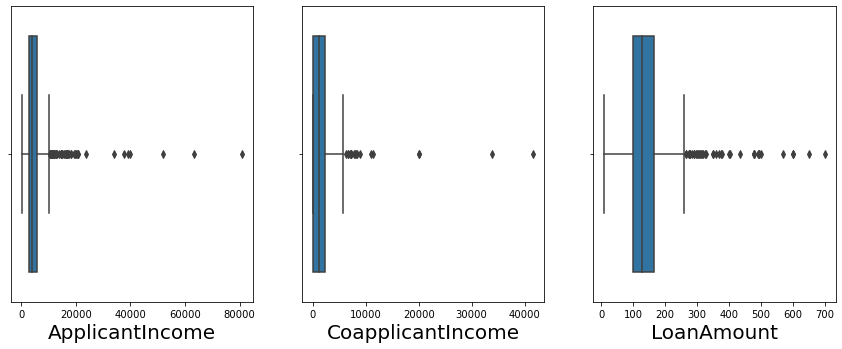

In [ ]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in X[['ApplicantIncome','CoapplicantIncome','LoanAmount']]:
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.boxplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

All columns have a lot of outliers

# Removing Outliers using Z score Method

In [ ]:
df2 = X[['ApplicantIncome','CoapplicantIncome','LoanAmount']].copy()

In [ ]:
df2

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849,0.0,146.412162
1,4583,1508.0,128.000000
2,3000,0.0,66.000000
3,2583,2358.0,120.000000
4,6000,0.0,141.000000
...,...,...,...
609,2900,0.0,71.000000
610,4106,0.0,40.000000
611,8072,240.0,253.000000
612,7583,0.0,187.000000


In [ ]:
from scipy.stats import zscore
z=np.abs(zscore(df2))
threshold=3
np.where(z>3)

(array([  9, 126, 130, 155, 155, 171, 171, 177, 177, 183, 185, 278, 308,
        333, 333, 369, 402, 409, 417, 432, 443, 487, 506, 523, 525, 561,
        581, 600, 604], dtype=int64),
 array([1, 0, 2, 0, 2, 0, 2, 1, 2, 0, 0, 2, 2, 0, 2, 2, 1, 0, 1, 2, 0, 2,
        2, 2, 2, 2, 1, 1, 2], dtype=int64))

In [ ]:
df3 = df2[(z<3).all(axis = 1)]
df3

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849,0.0,146.412162
1,4583,1508.0,128.000000
2,3000,0.0,66.000000
3,2583,2358.0,120.000000
4,6000,0.0,141.000000
...,...,...,...
609,2900,0.0,71.000000
610,4106,0.0,40.000000
611,8072,240.0,253.000000
612,7583,0.0,187.000000


In [ ]:
df3.shape

(589, 3)

In [ ]:
df2.shape

(614, 3)

# % DATA LOSS

In [ ]:
# checking data loss percentage
print ("Shape of the dataframe before removing outliers: ", df2.shape)
print ("Shape of the dataframe after removing outliers: ", df3.shape)
print ("Percentage of data loss post outlier removal: ", (df2.shape[0]-df3.shape[0])/df2.shape[0]*100)



Shape of the dataframe before removing outliers:  (614, 3)
Shape of the dataframe after removing outliers:  (589, 3)
Percentage of data loss post outlier removal:  4.071661237785016


4.071% data loss is within acceptable range

In [ ]:
dropindx = X.index.difference(df3.index)

In [ ]:
dropindx

Int64Index([  9, 126, 130, 155, 171, 177, 183, 185, 278, 308, 333, 369, 402,
            409, 417, 432, 443, 487, 506, 523, 525, 561, 581, 600, 604],
           dtype='int64')

In [ ]:
df.drop(dropindx,inplace = True) #dropping the outliers from original features Dataframe

In [ ]:
df.reset_index(drop=True,inplace = True)

In [ ]:
df.shape


(589, 12)

# Checking for Skewness in Data

In [ ]:
X = df.drop(columns = ['Loan_Status'])
y = df['Loan_Status']

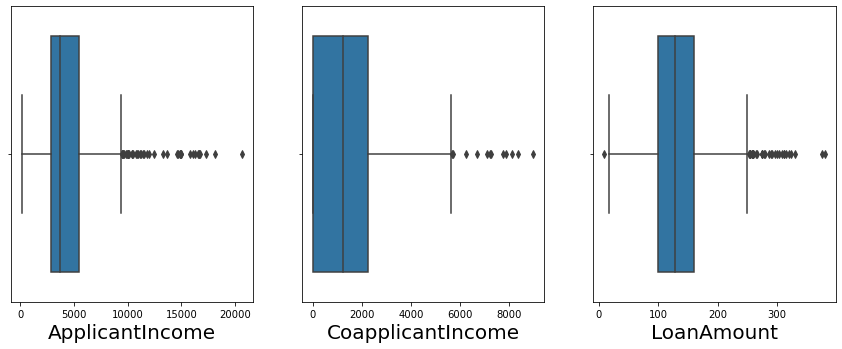

In [ ]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in X[['ApplicantIncome','CoapplicantIncome','LoanAmount']]:
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.boxplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Some outliers have been removed.

# Checking for Skewness

In [ ]:
X.skew()

ApplicantIncome      2.164762
CoapplicantIncome    1.353191
LoanAmount           1.076221
Loan_Amount_Term    -2.433130
Credit_History      -1.953298
dtype: float64

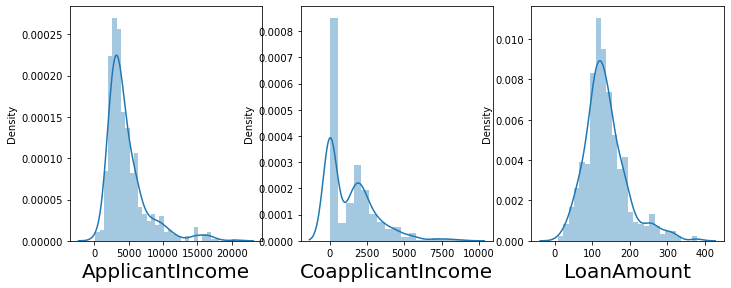

In [ ]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in X[['ApplicantIncome','CoapplicantIncome','LoanAmount']]:
    if plotnum<=35:
        plt.subplot(5,5,plotnum)
        sns.distplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Considerable skewness exists in the data distributions.

# Reducing skewness further using PowerTransformer

In [ ]:
from sklearn.preprocessing import PowerTransformer

In [ ]:
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)

In [ ]:
df4 = X[['ApplicantIncome','CoapplicantIncome','LoanAmount']]

In [ ]:
transformed= powtrans.fit_transform(df4)

In [ ]:
transformed = pd.DataFrame(transformed, columns=df4.columns) #to convert numpy array back into dataframe

In [ ]:
transformed.skew()

ApplicantIncome      0.028063
CoapplicantIncome   -0.186195
LoanAmount           0.060143
dtype: float64

In [ ]:
transformed.index = X.index

In [ ]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount']] = transformed[['ApplicantIncome','CoapplicantIncome','LoanAmount']]


In [ ]:
df.skew()

ApplicantIncome      0.028063
CoapplicantIncome   -0.186195
LoanAmount           0.060143
Loan_Amount_Term    -2.433130
Credit_History      -1.953298
dtype: float64

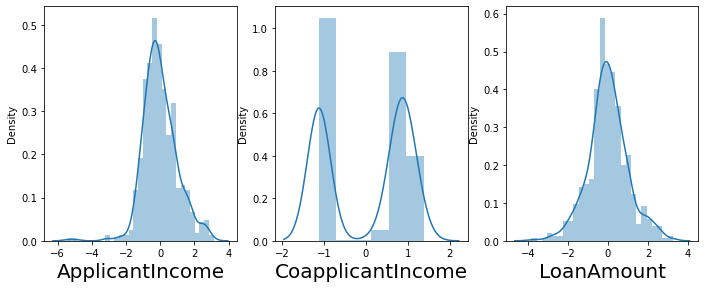

In [ ]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in df[['ApplicantIncome','CoapplicantIncome','LoanAmount']]:
    if plotnum<=35:
        plt.subplot(5,5,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Distributions look much more Normalised.

# Encoding the categorical Feature Columns

In [ ]:
X[['Gender','Married','Education','Self_Employed','Property_Area']].nunique()

Gender           2
Married          2
Education        2
Self_Employed    2
Property_Area    3
dtype: int64

In [ ]:
object_datatype

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in object_datatype[1:]:
    df[i] = le.fit_transform(df[i].values.reshape(-1,1))

In [ ]:
df.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.688986,-1.119438,0.316179,360.0,1.0,2,1
1,1,1,1,0,0,0.239843,0.748807,-0.012325,360.0,1.0,0,0
2,1,1,0,0,1,-0.525799,-1.119438,-1.391277,360.0,1.0,2,1
3,1,1,0,1,0,-0.791841,0.899419,-0.163769,360.0,1.0,2,1
4,1,0,0,0,0,0.736280,-1.119438,0.222283,360.0,1.0,2,1


In [ ]:
df['Loan_Status'].unique()

array([1, 0])

Loan Granted= 1, Loan not Granted=0

# Finding Correlation

In [ ]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.374745,0.184580,0.050036,0.000841,0.058502,0.230767,0.158553,-0.084495,0.016096,-0.022807,0.021942
Married,0.374745,1.000000,0.333887,0.015846,-0.004453,-0.022535,0.334429,0.173314,-0.100764,0.012408,0.010586,0.095124
Dependents,0.184580,0.333887,1.000000,0.068588,0.055481,0.105559,0.001199,0.128371,-0.088304,-0.014654,0.006005,0.021937
Education,0.050036,0.015846,0.068588,1.000000,-0.003507,-0.168924,0.037050,-0.131758,-0.079807,-0.078559,-0.065623,-0.092852
Self_Employed,0.000841,-0.004453,0.055481,-0.003507,1.000000,0.215911,-0.100679,0.105670,-0.054191,-0.012904,-0.030248,-0.016617
ApplicantIncome,0.058502,-0.022535,0.105559,-0.168924,0.215911,1.000000,-0.359986,0.438097,-0.040969,0.032011,-0.016277,-0.003320
CoapplicantIncome,0.230767,0.334429,0.001199,0.037050,-0.100679,-0.359986,1.000000,0.196155,0.012664,0.000218,-0.068086,0.080277
LoanAmount,0.158553,0.173314,0.128371,-0.131758,0.105670,0.438097,0.196155,1.000000,0.094820,-0.012470,-0.098616,-0.039999
Loan_Amount_Term,-0.084495,-0.100764,-0.088304,-0.079807,-0.054191,-0.040969,0.012664,0.094820,1.000000,-0.007756,-0.071976,-0.021418
Credit_History,0.016096,0.012408,-0.014654,-0.078559,-0.012904,0.032011,0.000218,-0.012470,-0.007756,1.000000,-0.007020,0.555902


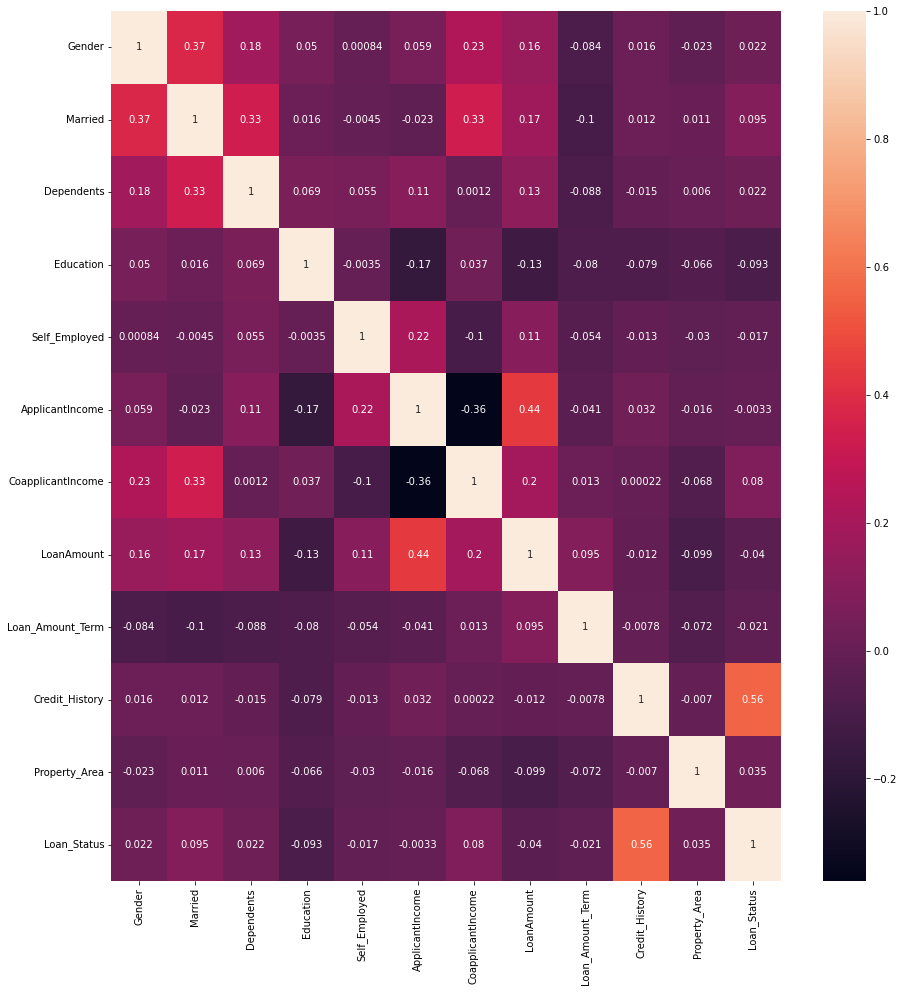

In [ ]:
plt.figure(figsize=(15,16))
sns.heatmap(df.corr(),annot=True,)
plt.show()

# Visualizing correlation of feature columns with label column

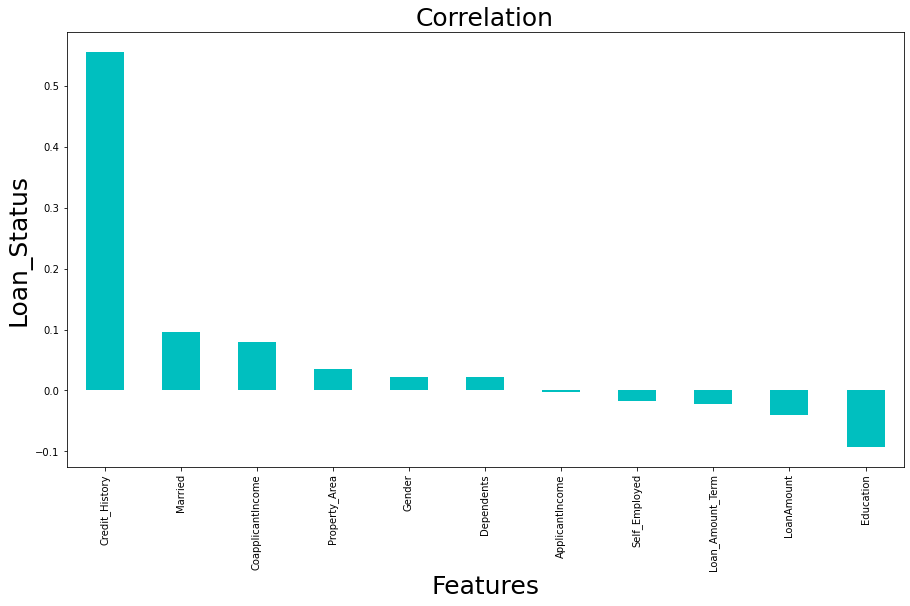

In [ ]:
plt.figure(figsize = (15,8))
df.corr()['Loan_Status'].sort_values(ascending = False).drop(['Loan_Status']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=25)
plt.ylabel('Loan_Status',fontsize=25)
plt.title('Correlation',fontsize = 25)
plt.show()

Credit_History,Married,CoapplicantIncome,Property_Area,Gender,Dependents have the positive correlation with Loan_Status, while ApplicantIncome,Self_Employed,Load_Amount_Term,LoanAmount & Education have the highest negative correlation with Loan_Status.

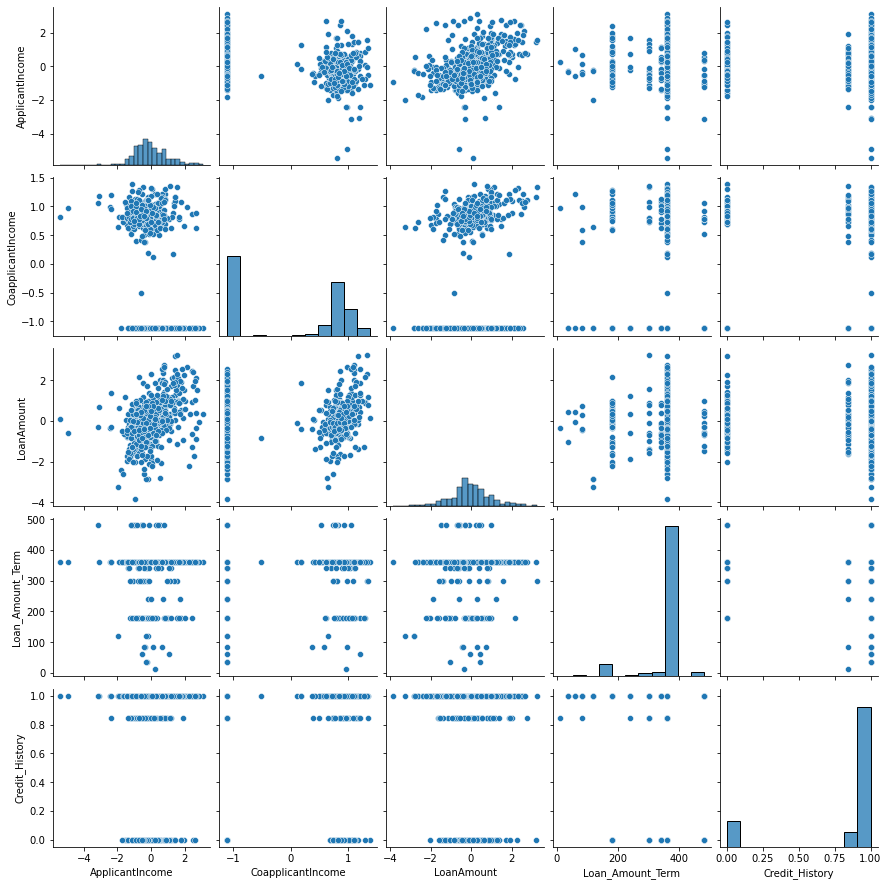

In [ ]:
sns.pairplot(df)

In [ ]:
# LoanAmount have positive correlation with ApplicantIncome

In [ ]:
X = df.drop(columns = ['Loan_Status'])
Y = df['Loan_Status']

# Feature Selection

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)

In [ ]:
scaled_X

array([[ 0.47653262, -1.36353339, -0.72840172, ...,  0.27920736,
         0.45251671,  1.22292864],
       [ 0.47653262,  0.73338872,  0.27634913, ...,  0.27920736,
         0.45251671, -1.31335646],
       [ 0.47653262,  0.73338872, -0.72840172, ...,  0.27920736,
         0.45251671,  1.22292864],
       ...,
       [ 0.47653262,  0.73338872,  0.27634913, ...,  0.27920736,
         0.45251671,  1.22292864],
       [ 0.47653262,  0.73338872,  1.28109999, ...,  0.27920736,
         0.45251671,  1.22292864],
       [-2.09849225, -1.36353339, -0.72840172, ...,  0.27920736,
        -2.40063947, -0.04521391]])

# Checking for Multicollinearity using Variance Inflation Factor

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame()


In [ ]:
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]

In [ ]:
vif

,Features,vif
0,Gender,1.215437
1,Married,1.411776
2,Dependents,1.174352
3,Education,1.066578
4,Self_Employed,1.056177
5,ApplicantIncome,1.767331
6,CoapplicantIncome,1.591527
7,LoanAmount,1.572401
8,Loan_Amount_Term,1.055043
9,Credit_History,1.009754


There is no Multicollinearity

# This is a Classification problem since Target/ Lable column ('Loan_Status') has Categorical type of Data.

# Classification Model Building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, confusion_matrix

In [ ]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, Y, test_size=0.20, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 90.67796610169492 on Random State 744


In [ ]:
lg= LogisticRegression()
dtc=DecisionTreeClassifier()
SV =  SVC()
knn = KNeighborsClassifier()
rfc = RandomForestClassifier()
adbc = AdaBoostClassifier()
gnb = GaussianNB()
etc=ExtraTreesClassifier()
gbc = GradientBoostingClassifier()

# Training the Models

In [ ]:
lg.fit(X_train,Y_train)
dtc.fit(X_train,Y_train)
SV.fit(X_train,Y_train)
knn.fit(X_train,Y_train)
rfc.fit(X_train,Y_train)
adbc.fit(X_train,Y_train)
gnb.fit(X_train,Y_train)
etc.fit(X_train,Y_train)
gbc.fit(X_train,Y_train)

GradientBoostingClassifier()

All Models have been trained

# Logistic Regression Model Accuracy

In [ ]:
lgpred = lg.predict(X_test)
accu = classification_report(Y_test,lgpred)

In [ ]:
conf_matrx = confusion_matrix(Y_test,lgpred)
conf_matrx

array([[15, 25],
       [ 1, 77]], dtype=int64)

In [ ]:
print(accu)

              precision    recall  f1-score   support

           0       0.94      0.38      0.54        40
           1       0.75      0.99      0.86        78

    accuracy                           0.78       118
   macro avg       0.85      0.68      0.70       118
weighted avg       0.82      0.78      0.75       118



# Decision Tree Model Accuracy

In [ ]:
dtcpred = dtc.predict(X_test)
accu = classification_report(Y_test,dtcpred)

In [ ]:
conf_matrx = confusion_matrix(Y_test,dtcpred)
conf_matrx

array([[19, 21],
       [16, 62]], dtype=int64)

In [ ]:
print(accu)

              precision    recall  f1-score   support

           0       0.54      0.47      0.51        40
           1       0.75      0.79      0.77        78

    accuracy                           0.69       118
   macro avg       0.64      0.63      0.64       118
weighted avg       0.68      0.69      0.68       118



# Supplier Vector Model Accuracy

In [ ]:
SVpred = SV.predict(X_test)
accu = classification_report(Y_test,SVpred)

In [ ]:
conf_matrx = confusion_matrix(Y_test,SVpred)
conf_matrx

array([[15, 25],
       [ 1, 77]], dtype=int64)

In [ ]:
print(accu)

              precision    recall  f1-score   support

           0       0.94      0.38      0.54        40
           1       0.75      0.99      0.86        78

    accuracy                           0.78       118
   macro avg       0.85      0.68      0.70       118
weighted avg       0.82      0.78      0.75       118



# K Nearest Neighbours Classifier Model Accuracy

In [ ]:
knnpred = knn.predict(X_test)
accu = classification_report(Y_test,knnpred)

In [ ]:
conf_matrx = confusion_matrix(Y_test,knnpred)
conf_matrx

array([[16, 24],
       [ 5, 73]], dtype=int64)

In [ ]:
print(accu)

              precision    recall  f1-score   support

           0       0.76      0.40      0.52        40
           1       0.75      0.94      0.83        78

    accuracy                           0.75       118
   macro avg       0.76      0.67      0.68       118
weighted avg       0.76      0.75      0.73       118



# Random Forest Classifier Model Accuracy

In [ ]:
rfcpred = rfc.predict(X_test)
accu = classification_report(Y_test,rfcpred)

In [ ]:
conf_matrx = confusion_matrix(Y_test,rfcpred)
conf_matrx

array([[15, 25],
       [ 5, 73]], dtype=int64)

In [ ]:
print(accu)

              precision    recall  f1-score   support

           0       0.75      0.38      0.50        40
           1       0.74      0.94      0.83        78

    accuracy                           0.75       118
   macro avg       0.75      0.66      0.66       118
weighted avg       0.75      0.75      0.72       118



# AdaBoost Classifier Model Accuracy

In [ ]:
adbcpred = adbc.predict(X_test)
accu = classification_report(Y_test,adbcpred)

In [ ]:
conf_matrx = confusion_matrix(Y_test,adbcpred)
conf_matrx

array([[15, 25],
       [ 4, 74]], dtype=int64)

In [ ]:
print(accu)

              precision    recall  f1-score   support

           0       0.79      0.38      0.51        40
           1       0.75      0.95      0.84        78

    accuracy                           0.75       118
   macro avg       0.77      0.66      0.67       118
weighted avg       0.76      0.75      0.73       118



# Model Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score as cvs

# Logistic Regression

In [ ]:
print(cvs(lg,scaled_X,Y,cv=5).mean())


0.8166594234390845


# Random Forest Classifier

In [ ]:
print(cvs(rfc,scaled_X,Y,cv=5).mean())

0.8013762132406201


# Decision Tree Classifier

In [ ]:
print(cvs(dtc,scaled_X,Y,cv=5).mean())

0.6978415181805012


# K Nearest Neighbours Classifier

In [ ]:
print(cvs(knn,scaled_X,Y,cv=5).mean())

0.7894538606403013


# Support Vector Classifier

In [ ]:
print(cvs(SV,scaled_X,Y,cv=5).mean())

0.8183543386933219


# AdaBoost Classifier

In [ ]:
print(cvs(adbc,scaled_X,Y,cv=5).mean())

0.7877879182963928


# Based on comparing Accuracy Score results, with Cross Validation results, it is determined that Logistic Regression is the best model.

# ROC AUC Scores

# Logistic Regression

In [ ]:
roc_auc_score(Y_test,lgpred)

0.6810897435897436

# Random Forest Classifier

In [ ]:
roc_auc_score(Y_test,rfcpred)

0.655448717948718

# Decision Tree Classifier

In [ ]:
roc_auc_score(Y_test,dtcpred)

0.6349358974358974

# K Nearest Neighbours Classifier

In [ ]:
roc_auc_score(Y_test,knnpred)

0.667948717948718

# Support Vector Classifier

In [ ]:
roc_auc_score(Y_test,SVpred)

0.6810897435897436

# AdaBoost Classifier

In [ ]:
roc_auc_score(Y_test,adbcpred)

0.6618589743589743

# ROC AUC curves


In [ ]:
from sklearn.metrics import plot_roc_curve

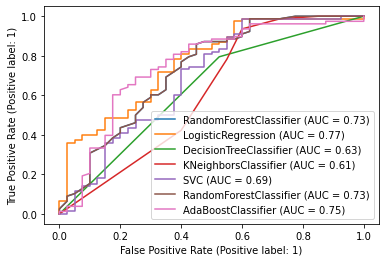

In [ ]:
disp = plot_roc_curve(rfc,X_test,Y_test)
mod = [lg,dtc,knn,SV,rfc,adbc]
for i in mod:
    plot_roc_curve(i,X_test,Y_test, ax=disp.ax_)
plt.legend(prop={'size':10}, loc = 'lower right')
plt.show()

# Based on the above graph and roc_auc_scores, Logistic Regression is the best model for the dataset, with AUC = 0.77 and roc_auc_score = 0.68

# Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression

In [ ]:
parameter = {'C':[0.001,0.01],'penalty':['l1', 'l2'],'dual': [True,False],'fit_intercept':[True,False],'random_state':[1,2,3],'solver':['liblinear'],'max_iter':[100,200]}

In [ ]:
GridCV = GridSearchCV(LogisticRegression(),parameter,cv=5,n_jobs = -1,verbose=2)

In [ ]:
GridCV.fit(X_train,Y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01], 'dual': [True, False],
                         'fit_intercept': [True, False], 'max_iter': [100, 200],
                         'penalty': ['l1', 'l2'], 'random_state': [1, 2, 3],
                         'solver': ['liblinear']},
             verbose=2)

In [ ]:
GridCV.best_params_

{'C': 0.001,
 'dual': True,
 'fit_intercept': True,
 'max_iter': 100,
 'penalty': 'l2',
 'random_state': 1,
 'solver': 'liblinear'}

In [ ]:
Best_mod1 = LogisticRegression(C = 0.01,dual = True,fit_intercept = True,max_iter = 100,multi_class = 'auto', penalty = 'l2',random_state= 1,solver = 'liblinear')
Best_mod1.fit(X_train,Y_train)
lgpred = Best_mod1.predict(X_test)
acc = accuracy_score(Y_test,lgpred)
print(acc*100)

77.96610169491525


# Logistic Regression has an accuracy score of 77.96%

In [ ]:
conf_matrx = confusion_matrix(Y_test,lgpred)
conf_matrx

array([[15, 25],
       [ 1, 77]], dtype=int64)

# Saving The Model

In [ ]:
import joblib
joblib.dump(Best_mod1,"BestModelLoan.pkl")

['BestModelLoan.pkl']

# Loading The Model

In [ ]:
mod=joblib.load("BestModelLoan.pkl")

In [ ]:
print(mod.predict(X_test))

[1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1]


In [ ]:
Prediction_accuracy = pd.DataFrame({'Predictions': mod.predict(X_test), 'Actual Values': Y_test})
Prediction_accuracy.head(50)

,Predictions,Actual Values
241,1,1
267,1,1
230,1,1
108,1,1
57,1,1
412,1,1
246,0,0
390,1,1
401,1,1
42,1,1
